In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from datetime import datetime

In [30]:
df = pd.read_csv('../notebooks-0921/data/AirPassengers.csv')

In [31]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [33]:
# para convertir la cadena de texto en fecha
pd.to_datetime(df['Month'])

0     1949-01-01
1     1949-02-01
2     1949-03-01
3     1949-04-01
4     1949-05-01
         ...    
139   1960-08-01
140   1960-09-01
141   1960-10-01
142   1960-11-01
143   1960-12-01
Name: Month, Length: 144, dtype: datetime64[ns]

In [34]:
df['fecha'] = pd.to_datetime(df['Month'])

In [35]:
df.rename(columns={'#Passengers':'passengers'}, inplace=True)

In [36]:
df.head()

,Month,passengers,fecha
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [15]:
plt.rcParams['figure.figsize'] = (12,8)

<AxesSubplot:>

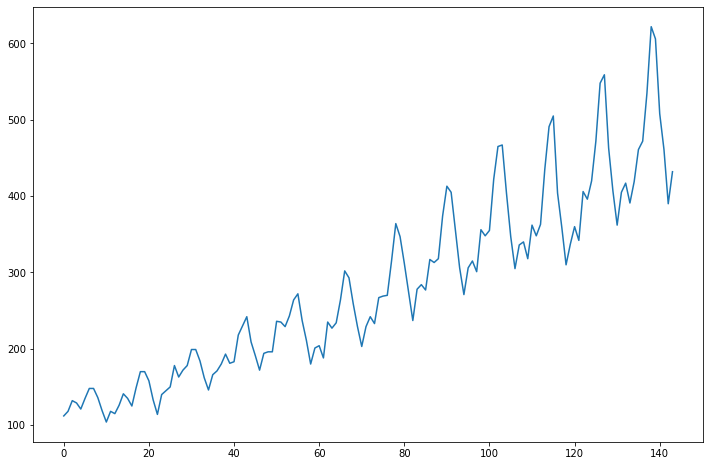

In [16]:
df['passengers'].plot()

In [39]:
df.drop(['Month'], axis=1, inplace=True)

In [46]:
df.set_index('fecha', inplace=True)

In [47]:
df.head()

,passengers
fecha,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
ts = df['passengers']

In [49]:
ts.head()

fecha
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

In [50]:
decomposition = seasonal_decompose(ts)

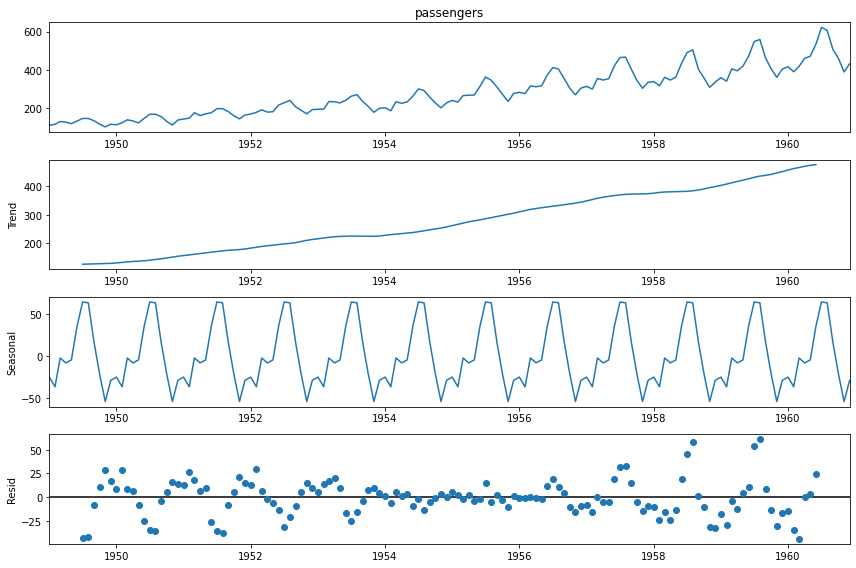

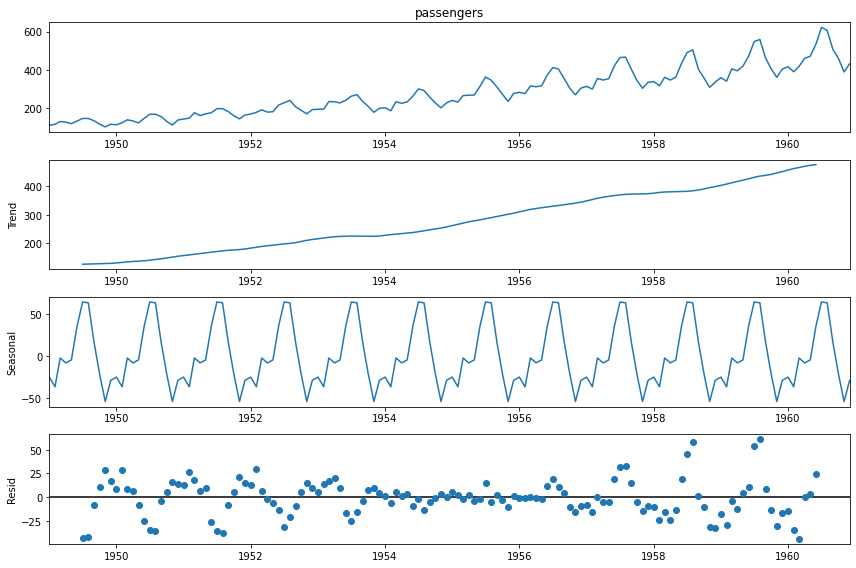

In [51]:
decomposition.plot()

In [52]:
dir(decomposition)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_observed',
 '_resid',
 '_seasonal',
 '_trend',
 '_weights',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend',
 'weights']

In [53]:
decomposition.trend

fecha
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [54]:
decomposition.seasonal

fecha
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

<AxesSubplot:xlabel='fecha'>

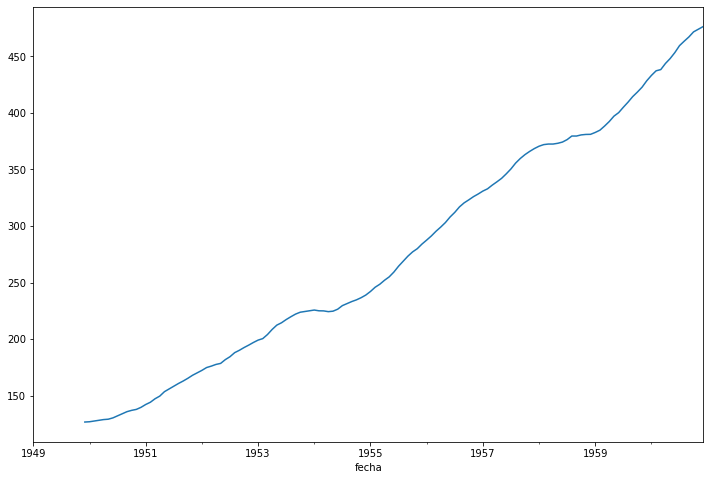

In [55]:
ts.rolling(12).mean().plot()

In [56]:
adfuller(ts)

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [57]:
adfuller(ts.diff().dropna())

(-2.8292668241700034,
 0.054213290283824954,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [58]:
adfuller(ts.diff().diff().dropna())

(-16.384231542468488,
 2.7328918500143186e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275604)

In [59]:
adfuller(decomposition.resid.dropna())

(-5.2984275870507345,
 5.516868902226235e-06,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 849.940140147128)

In [60]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [65]:
model = SARIMAX(ts,
                order=(2,1,2),
                seasonal_order=(2,1,2,12),
                maxiter=100,
                freq='MS')

C:\Users\Natalia Gonzalez\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [66]:
help(model.fit)

Help on method fit in module statsmodels.tsa.statespace.mlemodel:

fit(start_params=None, transformed=True, includes_fixed=False, cov_type=None, cov_kwds=None, method='lbfgs', maxiter=50, full_output=1, disp=5, callback=None, return_params=False, optim_score=None, optim_complex_step=None, optim_hessian=None, flags=None, low_memory=False, **kwargs) method of statsmodels.tsa.statespace.sarimax.SARIMAX instance
    Fits the model by maximum likelihood via Kalman filter.
    
    Parameters
    ----------
    start_params : array_like, optional
        Initial guess of the solution for the loglikelihood maximization.
        If None, the default is given by Model.start_params.
    transformed : bool, optional
        Whether or not `start_params` is already transformed. Default is
        True.
    includes_fixed : bool, optional
        If parameters were previously fixed with the `fix_params` method,
        this argument describes whether or not `start_params` also includes
        the 

In [68]:
results = model.fit(maxiter=100)
results

In [69]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -498.048
Date:                            Sat, 15 Jan 2022   AIC                           1014.095
Time:                                    12:01:06   BIC                           1039.972
Sample:                                01-01-1949   HQIC                          1024.610
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5751      0.439      1.311      0.190      -0.285       1.435
ar.L2          0.2259      0.344      0.656      0.512      -0.449       0.900
ma.L1         -1.0169      0.427     -2.383      0.017      -1.853      -0.181
ma.L2          0.0371      0.416      0.089      0.929      -0.778       0.853
ar.S.L12       1.3975      0.409      3.418      0.001       0.596       2.199
ar.S.L24      -0.4795      0.520     -0.922      0.356      -1.499       0.540
ma.S.L12      -1.7905      4.631     -0.387      0.699     -10.868       7.287
ma.S.L24       0.9765      5.210      0.187      0.851      -9.235      11.188
sigma2        94.0821    447.230      0.210      0.833    -782.472     970.637
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.69
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.62   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
ts.tail()

fecha
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: passengers, dtype: int64

In [72]:
# es un objeto / metodo: Predicted mean (para la predicción)
results.get_prediction(start='1960-01-01', end='1960-12-01').predicted_mean

1960-01-01    417.469247
1960-02-01    394.010653
1960-03-01    453.855112
1960-04-01    423.932370
1960-05-01    464.861772
1960-06-01    538.012064
1960-07-01    608.974557
1960-08-01    622.446872
1960-09-01    512.151049
1960-10-01    446.904245
1960-11-01    405.437709
1960-12-01    438.782493
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:>

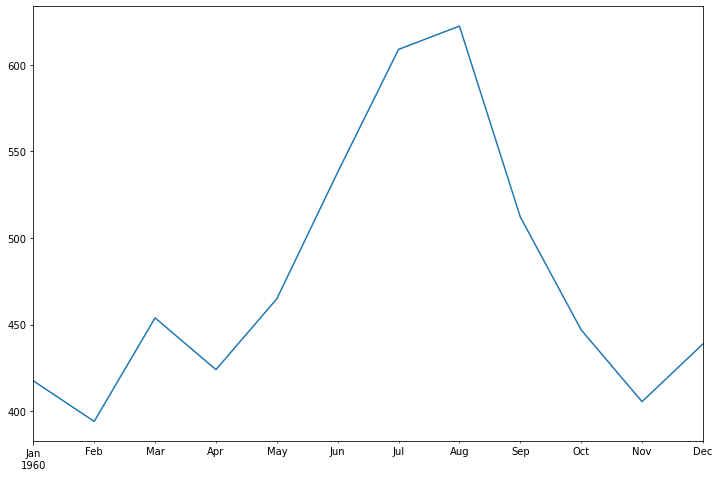

In [73]:
results.get_prediction(start='1960-01-01', end='1960-12-01').predicted_mean.plot()

<AxesSubplot:>

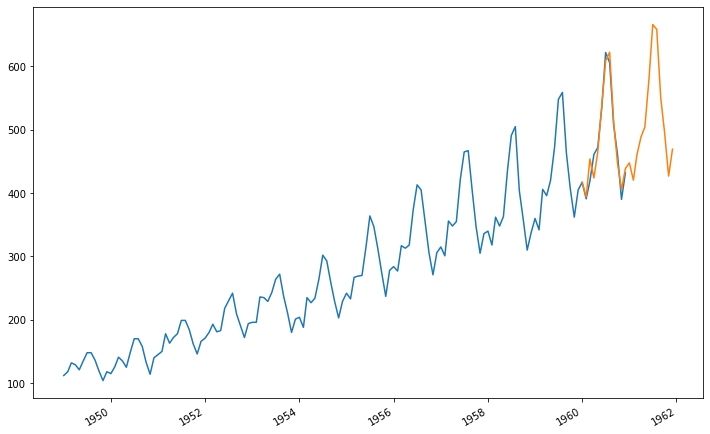

In [75]:
plt.plot(ts)
results.get_prediction(start='1960-01-01', end='1961-12-01').predicted_mean.plot()

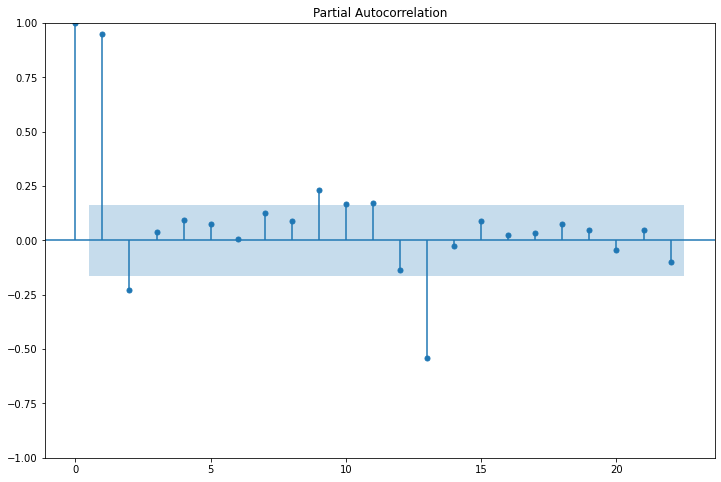

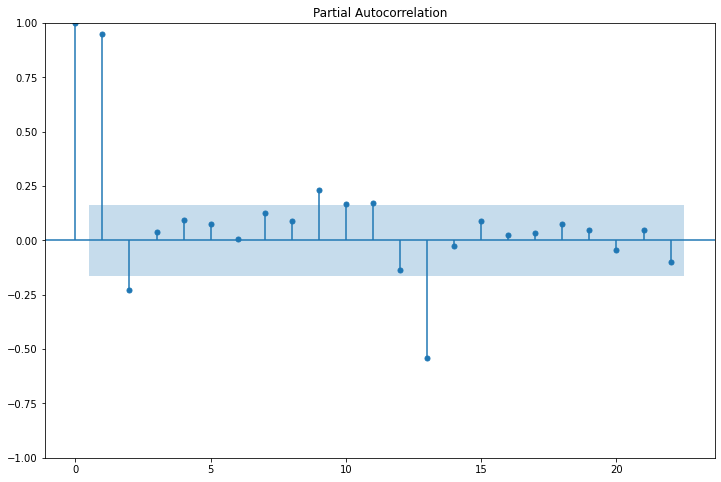

In [78]:
plot_pacf(ts, method='ywm')

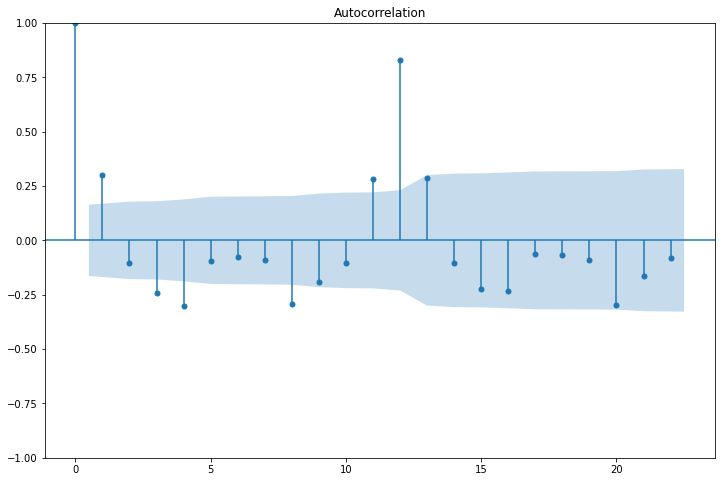

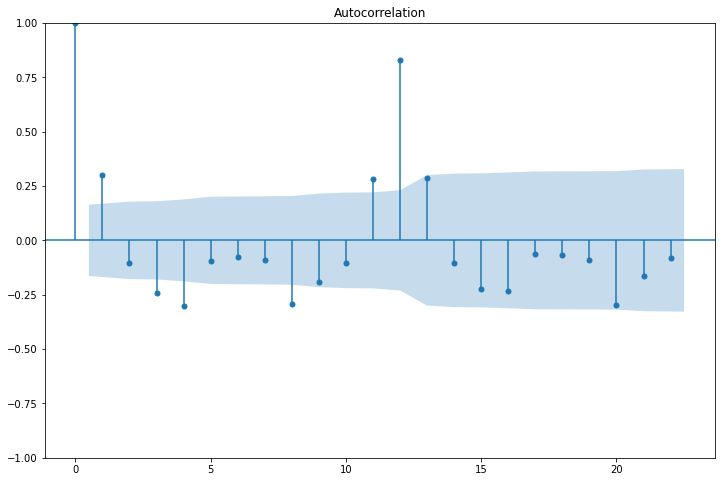

In [79]:
plot_acf(ts.diff().dropna())

In [76]:
from pmdarima import auto_arima

In [77]:
help(auto_arima)

# X equivalente a exogenos
# d numero de veces que tenemos que determinar para que la señal sea estacinaria

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [82]:
# trace para que se vea el ghost
model = auto_arima (ts, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [83]:
dir (model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_exog',
 '_check_n_features',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_warn_for_older_version',
 'aic',
 'aicc',
 'arima_res_',
 'arparams',
 'arroots',
 'bic',
 'bse',
 'conf_int',
 'df_model',
 'df_resid',
 'fit',
 'fit_predict',
 'fit_with_exog_',
 'get_params',
 'hqic',
 'maparams',
 'maroots',
 'maxiter',
 'method',
 'nobs_',
 'oob',
 'oob_',
 'oob_preds_',
 'order',
 'out_of_sample_size',
 'params',
 'pkg_version_',
 'plot_diagnostics',
 'pr

In [87]:
pred = model.predict(n_periods=12)
pred

array([467.57377061, 490.49450168, 509.13688184, 492.55472291,
       495.30595597, 475.94780835, 476.33984867, 475.55214253,
       472.35381322, 483.88965545, 475.57016802, 485.92151661])

In [85]:
#numpy - para crear una serie
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs) -> pandas.core.indexes.datetimes.DatetimeIndex
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : int, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D'
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/

In [86]:
pd.date_range(start='1961-01-01', end='1961-12-01', freq='MS')

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')

<AxesSubplot:>

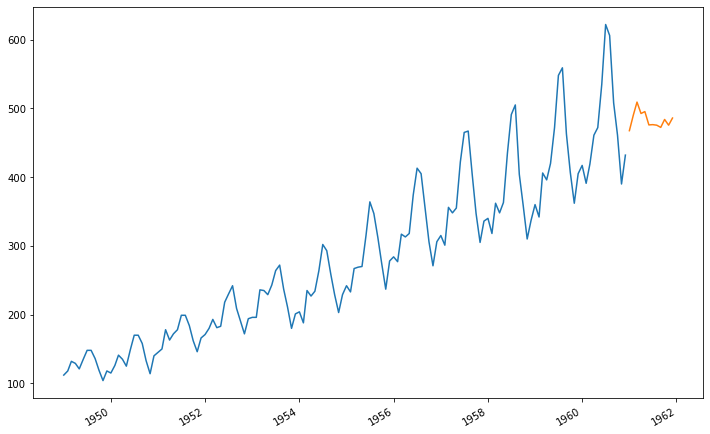

In [91]:
plt.plot(ts)
pd.Series(pred, index=pd.date_range(start='1961-01-01', end='1961-12-01', freq='MS')).plot()

In [ ]:
from prophet import Prophet

In [ ]:
model = Prophet()

In [ ]:
help (model.fit)

In [ ]:
# para recuperar la fecha como columna
ts.reset_index()

In [ ]:
ts.reset_index().rename(columns={'fecha':'ds', 'passengers':'y'})

In [ ]:
df

In [ ]:
model.fit(df)

In [ ]:
model.predict(df)

In [ ]:
model.predict(df).yhat

In [ ]:
ts.head()

In [ ]:
pred = pd.Series(model.predict(df).yhat,
                 index = pd.date_range(start='1949-01-01',
                                       end='1960-12-01', freq='MS'))

# no funciona

In [ ]:
y_pred = pd.DataFrame({'y':yhat,
              'ds': pd.date_range(start='1949-01-01',end='1960-12-01', freq='MS')}).set_index('ds')

In [ ]:
plt.plot(ts)
plt.plot(y_pred)

In [ ]:
ds = pd.DataFrame({'y':yhat,
              'ds': pd.date_range(start='1960-01-01',end='1961-12-01', freq='MS')})

In [ ]:
model.predict(ds).yhat

In [ ]:
yhat = model.predict(ds).yhat

In [ ]:
ds['y_pred'] = yhat

In [ ]:
plt.plot(ts)
plt.plot(ds.set_index('ds'))